In [1]:
pip install yfinance fastdtw numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512412 sha256=c4d9651c4a780e7742a20a29f98a89e6b3889bf9393dec5e6e2d474c654a4f11
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [2]:
import yfinance as yf
import numpy as np
from fastdtw import fastdtw
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def dtw_distance(stock_1, stock_2):

   # Computes the Dynamic Time Warping (DTW) distance between two stock time series.
   # The lower the result, the more similar the two stock patterns are.

   distance, _ = fastdtw(stock_1, stock_2)
   return float(distance)

In [4]:
#  To download Stock Data
# We'll use yfinance to get the closing prices of various companies for a specified time period.
tickers = ["AAPL", "MSFT", "AMZN", "META", "GOOGL", "GOOG", "TSLA", "JPM", "JNJ", "V", "PG", "NVDA", "HD", "UNH", "PYPL"]
start_date = "2022-01-01"
end_date = "2023-01-01"

data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'].tolist() for ticker in tickers}

# Prepare data for our model
X = [data[ticker] for ticker in tickers]
y = tickers


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
#  Calculate Similarities Between Stocks
# We're going to compare every stock's price patterns with every other stock's patterns.
dtw_matrix = np.zeros((len(tickers), len(tickers)))
for i in range(len(tickers)):
   for j in range(len(tickers)):
       dtw_matrix[i, j] = dtw_distance(X[i], X[j])

print("\nHow Similar Are These Stocks?")
print(dtw_matrix)


How Similar Are These Stocks?
[[     0.          28634.58992767   4762.0749054    7237.20053101
    9120.32863617   9006.72057343  25913.40322113   4447.52022552
    3650.09998322  13048.3899765    1692.61000824   6755.4703598
   39030.3899765   89200.17006683  12386.17977142]
 [ 28634.58992767      0.          35847.38639069  15911.22063446
   38693.3368988   38584.56642151   5961.91970825  35337.78993225
   24194.02993774  14258.73002625  30556.77986145  12758.58021545
    6962.71984863  60565.58013916  43150.95980835]
 [  4976.70491791  35847.38639069      0.          10160.62548828
    2019.66538239   1904.89358521  31731.60617065   3114.89768982
   10831.90364838  20300.42644501   4180.66516113  11571.37967682
   46243.18643951  96412.96652985   2394.26135254]
 [  7327.18057251  16006.07065582  10168.41599274      0.
   13025.81711578  12922.69412231   5929.9103241    8196.28995514
   10032.62018585   9466.98949432   9459.37913513   4677.56047821
   28626.21875763  82836.65991974

<Axes: >

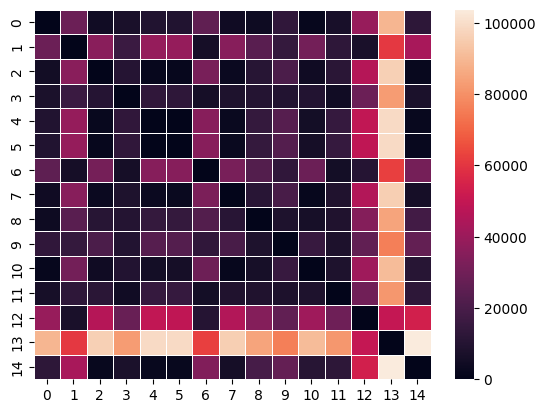

In [11]:
import seaborn as sns
import matplotlib.pylab as plt

sns.heatmap(dtw_matrix, linewidth=0.5)

In [6]:
#  Find Most Similar Stocks
# Using K-nearest neighbors with our DTW distance metric to find the most similar stocks.
knn = KNeighborsClassifier(metric=dtw_distance)

# Using KFold to split our data into parts (or "folds") for cross-validation.
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Let's try different values for K (number of neighbors) to find the best one.
param_grid = {'n_neighbors': list(range(1, min(len(tickers)-1, 10)))}

# GridSearchCV will try out each value of K and tell us the best one.
grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X, y)

print(f"\nBest Number of Neighbors: {grid_search.best_params_['n_neighbors']}")



Best Number of Neighbors: 1


In [7]:
# For each stock, let's find out which other stock is most similar to it.
distances, neighbors_idx = grid_search.best_estimator_.kneighbors(X, 2)
for i, ticker in enumerate(tickers):
   print(f"\n{ticker}'s closest neighbour is {tickers[neighbors_idx[i][1]]} with a similarity score of {distances[i][1]}.")



AAPL's closest neighbour is PG with a similarity score of 1692.610008239746.

MSFT's closest neighbour is TSLA with a similarity score of 5961.919708251953.

AMZN's closest neighbour is GOOG with a similarity score of 1904.8935852050781.

META's closest neighbour is NVDA with a similarity score of 4677.560478210449.

GOOGL's closest neighbour is GOOG with a similarity score of 114.77847290039062.

GOOG's closest neighbour is GOOGL with a similarity score of 114.77847290039062.

TSLA's closest neighbour is NVDA with a similarity score of 5553.903793334961.

JPM's closest neighbour is PG with a similarity score of 1971.1000518798828.

JNJ's closest neighbour is AAPL with a similarity score of 3678.819969177246.

V's closest neighbour is NVDA with a similarity score of 8016.499649047852.

PG's closest neighbour is AAPL with a similarity score of 1670.3999862670898.

NVDA's closest neighbour is META with a similarity score of 4684.2404708862305.

HD's closest neighbour is MSFT with a simi